<a href="https://colab.research.google.com/github/baldeoJV/CCADMACL_Proj_Clustering/blob/main/Coli%20Unsupervised%20MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
file_path = "NHANES_SES_RawData.csv"  # Update path in Colab
df = pd.read_csv(file_path)


In [5]:
display(df.head())
display(df.info())

,SEQN,RIDAGEYR,RIAGENDR,DMDEDUC2,INDFMPIR,OCD150,HOD051,DIQ010,MCQ010,MCQ160B,...,MCQ160M,MCQ160P,MCQ160L,MCQ550,MCQ220,HSQ590,LBXHA,HEQ010,KIQ022,RXQ033
0,130378.0,43.0,1.0,5.0,5.00,1.0,10.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,130379.0,66.0,1.0,5.0,5.00,1.0,9.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
2,130380.0,44.0,2.0,3.0,1.41,1.0,6.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,130386.0,34.0,1.0,4.0,1.33,1.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
4,130387.0,68.0,2.0,5.0,1.32,4.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      6064 non-null   float64
 1   RIDAGEYR  6064 non-null   float64
 2   RIAGENDR  6064 non-null   float64
 3   DMDEDUC2  6064 non-null   float64
 4   INDFMPIR  6064 non-null   float64
 5   OCD150    6064 non-null   float64
 6   HOD051    6064 non-null   float64
 7   DIQ010    6064 non-null   float64
 8   MCQ010    6064 non-null   float64
 9   MCQ160B   6064 non-null   float64
 10  MCQ160C   6064 non-null   float64
 11  MCQ160E   6064 non-null   float64
 12  MCQ160M   6064 non-null   float64
 13  MCQ160P   6064 non-null   float64
 14  MCQ160L   6064 non-null   float64
 15  MCQ550    6064 non-null   float64
 16  MCQ220    6064 non-null   float64
 17  HSQ590    6064 non-null   float64
 18  LBXHA     6064 non-null   float64
 19  HEQ010    6064 non-null   float64
 20  KIQ022    6064 non-null   floa

None

In [6]:
print(df.columns)


Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'DMDEDUC2', 'INDFMPIR', 'OCD150',
       'HOD051', 'DIQ010', 'MCQ010', 'MCQ160B', 'MCQ160C', 'MCQ160E',
       'MCQ160M', 'MCQ160P', 'MCQ160L', 'MCQ550', 'MCQ220', 'HSQ590', 'LBXHA',
       'HEQ010', 'KIQ022', 'RXQ033'],
      dtype='object')


In [7]:
# Drop Unnecessary Columns (SEQN is just an identifier)
df.drop(columns=['SEQN'], inplace=True)

In [8]:
# Handle Missing Values (Drop Rows with Missing Values)
df.dropna(inplace=True)

In [9]:
scaler = StandardScaler()
numeric_cols = ['RIDAGEYR', 'INDFMPIR', 'LBXHA']  # Selecting key numerical features
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [10]:
# Encode Categorical Variables (One-Hot Encoding for Occupation, Housing, etc.)
categorical_cols = ['RIAGENDR', 'DMDEDUC2', 'DIQ010', 'OCD150', 'HOD051']
df = pd.get_dummies(df, columns=categorical_cols)

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

In [12]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.drop(columns=['Cluster']))
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
df['PCA3'] = pca_result[:, 2]


In [13]:
df.to_csv("NHANES_Cleaned_Clustered.csv", index=False)


Cluster Characteristics:
          RIDAGEYR  INDFMPIR     LBXHA
Cluster                              
0        0.046186  1.120276  0.157472
1        0.830938 -0.551331  0.025447
2       -1.009212 -0.589800 -0.201676


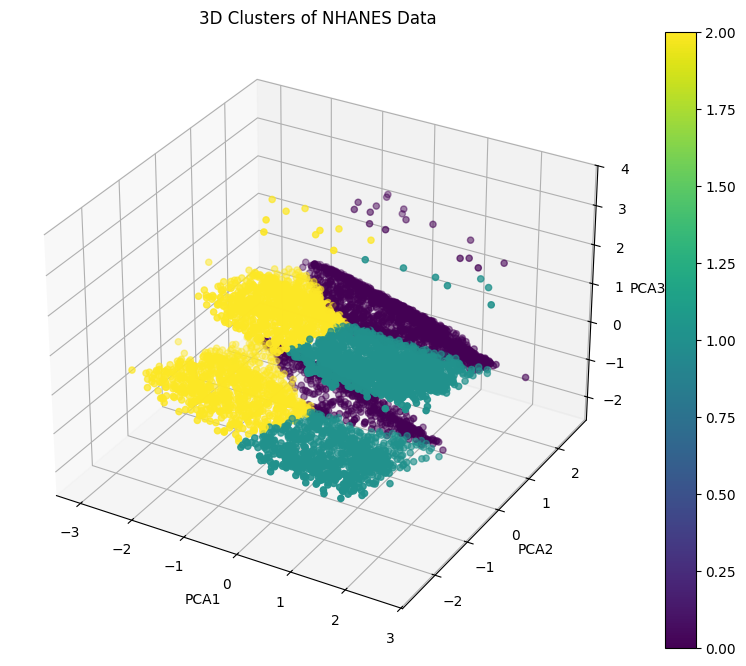

In [14]:
cluster_summary = df.groupby('Cluster')[['RIDAGEYR', 'INDFMPIR', 'LBXHA']].mean()
print("Cluster Characteristics:\n", cluster_summary)

# Visualize Clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.title("3D Clusters of NHANES Data")
plt.colorbar(sc)
plt.show()

In [15]:
# Display Cluster Summary and Data Preview
print(df.groupby('Cluster').mean())
print(df.head())


         RIDAGEYR  INDFMPIR    MCQ010   MCQ160B   MCQ160C   MCQ160E   MCQ160M  \
Cluster                                                                         
0        0.046186  1.120276  1.848752  1.981400  1.967695  1.987763  1.861478   
1        0.830938 -0.551331  1.831012  1.933612  1.951718  1.926184  1.815692   
2       -1.009212 -0.589800  1.791109  1.992501  2.008570  1.992501  1.959829   

          MCQ160P   MCQ160L    MCQ550  ...  HOD051_8.0  HOD051_9.0  \
Cluster                                ...                           
0        1.973568  1.963779  1.930984  ...    0.148311    0.070485   
1        1.863045  1.919220  1.842154  ...    0.054782    0.025534   
2        1.983931  1.978040  1.950723  ...    0.036422    0.015533   

         HOD051_10.0  HOD051_11.0  HOD051_12.0  HOD051_77.0  HOD051_99.0  \
Cluster                                                                    
0           0.037200     0.015174     0.018600     0.000489     0.000489   
1           0.0

In [17]:
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster} Summary Statistics:")
    display(df[df['Cluster'] == cluster].describe())


Cluster 0 Summary Statistics:


,RIDAGEYR,INDFMPIR,MCQ010,MCQ160B,MCQ160C,MCQ160E,MCQ160M,MCQ160P,MCQ160L,MCQ550,MCQ220,HSQ590,LBXHA,HEQ010,KIQ022,RXQ033,Cluster,PCA1,PCA2,PCA3
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.0,2043.000000,2043.000000,2043.000000
mean,0.046186,1.120276,1.848752,1.981400,1.967695,1.987763,1.861478,1.973568,1.963779,1.930984,1.849731,1.749388,0.157472,2.014195,1.988742,1.267254,0.0,0.039511,1.184935,-0.280823
std,0.841714,0.406878,0.428116,0.135141,0.293471,0.307189,0.383166,0.283891,0.363167,0.417110,0.393923,0.492692,0.960415,0.438471,0.256875,0.472598,0.0,0.953987,0.476013,0.922974
min,-1.911900,-0.386780,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.244667,1.000000,1.000000,1.000000,0.0,-2.213140,-0.307725,-2.200092
25%,-0.631484,0.983539,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,-1.244667,2.000000,2.000000,1.000000,0.0,-0.659775,0.847480,-1.297859
50%,0.183327,1.356084,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.766970,2.000000,2.000000,1.000000,0.0,0.062361,1.182763,0.082578
75%,0.648932,1.356084,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.766970,2.000000,2.000000,2.000000,0.0,0.738022,1.554288,0.400619
max,1.521944,1.356084,9.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.778606,9.000000,9.000000,9.000000,0.0,2.615601,2.595976,2.666908



Cluster 2 Summary Statistics:


,RIDAGEYR,INDFMPIR,MCQ010,MCQ160B,MCQ160C,MCQ160E,MCQ160M,MCQ160P,MCQ160L,MCQ550,MCQ220,HSQ590,LBXHA,HEQ010,KIQ022,RXQ033,Cluster,PCA1,PCA2,PCA3
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.0,1867.000000,1867.000000,1867.000000
mean,-1.009212,-0.589800,1.791109,1.992501,2.008570,1.992501,1.959829,1.983931,1.978040,1.950723,1.983931,1.644885,-0.201676,2.005356,1.991966,1.587038,2.0,-1.163570,-0.493470,0.313212
std,0.620699,0.684667,0.441990,0.086293,0.285279,0.086293,0.417969,0.325347,0.285501,0.443765,0.248811,0.478676,1.026744,0.338608,0.194897,0.640959,0.0,0.614673,0.734613,0.986666
min,-1.970101,-1.883440,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.244667,1.000000,1.000000,1.000000,2.0,-3.058441,-2.331824,-1.285092
25%,-1.504495,-1.173984,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,-1.244667,2.000000,2.000000,1.000000,2.0,-1.613245,-1.054163,-0.654366
50%,-1.097090,-0.503403,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.766970,2.000000,2.000000,2.000000,2.0,-1.135536,-0.441889,0.789502
75%,-0.573283,-0.056349,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.766970,2.000000,2.000000,2.000000,2.0,-0.687226,0.060712,1.204146
max,1.114538,1.356084,9.000000,2.000000,9.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,2.778606,9.000000,9.000000,9.000000,2.0,0.248571,1.184899,3.584045



Cluster 1 Summary Statistics:


,RIDAGEYR,INDFMPIR,MCQ010,MCQ160B,MCQ160C,MCQ160E,MCQ160M,MCQ160P,MCQ160L,MCQ550,MCQ220,HSQ590,LBXHA,HEQ010,KIQ022,RXQ033,Cluster,PCA1,PCA2,PCA3
count,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.0,2154.000000,2154.000000,2154.000000
mean,0.830938,-0.551331,1.831012,1.933612,1.951718,1.926184,1.815692,1.863045,1.919220,1.842154,1.752553,1.824048,0.025447,2.031569,1.946147,1.102136,1.0,0.971061,-0.696153,-0.005128
std,0.484411,0.675708,0.494507,0.544152,0.734960,0.473773,0.553597,0.498301,0.422291,0.486861,0.514134,0.537629,0.984159,0.619340,0.508978,0.302897,0.0,0.568773,0.729381,0.950502
min,-0.922487,-1.883440,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.244667,1.000000,1.000000,1.000000,1.0,-0.337619,-2.599229,-2.031242
25%,0.474330,-1.131871,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,-1.244667,2.000000,2.000000,1.000000,1.0,0.535386,-1.196592,-1.013508
50%,0.823535,-0.503403,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.766970,2.000000,2.000000,1.000000,1.0,1.004226,-0.699512,0.396452
75%,1.230940,-0.056349,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.766970,2.000000,2.000000,1.000000,1.0,1.393191,-0.116190,0.760121
max,1.521944,1.356084,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.778606,9.000000,9.000000,2.000000,1.0,2.591523,1.073020,2.861665
